In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install tensorflow==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 119.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting un

In [12]:
!pip install --upgrade h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras import layers
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1,EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

import os

Train Set


Loading pituitary: 100%|██████████| 651/651 [00:12<00:00, 52.42it/s] 



Test Set


Loading pituitary: 100%|██████████| 279/279 [00:05<00:00, 49.39it/s] 



Image Shape
x train= (2144, 240, 240, 3)
y train= (2144,)
x test= (920, 240, 240, 3)
y test= (920,)

Sample Images


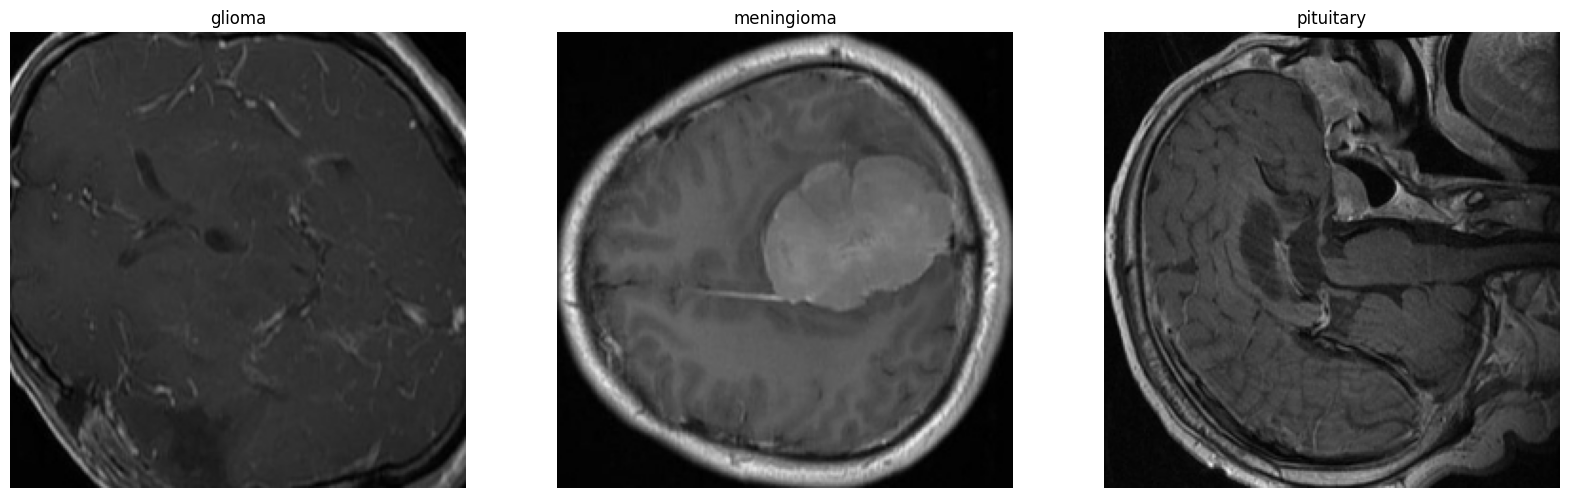

In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

def load_images(folder_path, labels, image_size):
    images = []
    class_labels = []
    for label in labels:
        label_folder = os.path.join(folder_path, label)
        for image_name in tqdm(os.listdir(label_folder), desc=f"Loading {label}"):
            image_path = os.path.join(label_folder, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (image_size, image_size))
            images.append(image)
            class_labels.append(label)
    return np.array(images), np.array(class_labels)

def main():
    base_folder = '/content/drive/MyDrive'
#     cropped_folder = 'split_images'
    split_folder = 'split_images'

    labels = ['glioma', 'meningioma', 'pituitary']
    image_size = 240
    
    print("Train Set")
    print("===========")
    train_folder_path = os.path.join(base_folder, split_folder, 'train')
    X_train, y_train = load_images(train_folder_path, labels, image_size)

    print("\nTest Set")
    print("=========")
    test_folder_path = os.path.join(base_folder, split_folder, 'test')
    X_test, y_test = load_images(test_folder_path, labels, image_size)

    print("\nImage Shape")
    print("===========")
    print("x train=", X_train.shape)
    print("y train=", y_train.shape)
    print("x test=", X_test.shape)
    print("y test=", y_test.shape)

    # Shuffle the dataset
    X_train, y_train = shuffle(X_train, y_train, random_state=100)
    X_test, y_test = shuffle(X_test, y_test, random_state=100)

    return X_train, y_train, X_test, y_test, labels

if __name__ == "__main__":
    X_train, y_train, X_test, y_test, labels = main()


# Plot example images from each class
    print("\nSample Images")
    print("===========")
fig, ax = plt.subplots(1, 3, figsize=(20, 20))

for i in labels:
    j = 0
    while True:
        if y_train[j] == i:
            ax[labels.index(i)].imshow(X_train[j])
            ax[labels.index(i)].set_title(i)
            ax[labels.index(i)].axis('off')
            break
        j += 1

plt.show()

# label encoding

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
# Load the EfficientNetB1 model pretrained on ImageNet
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(240, 240, 3)
)

# Add custom layers on top of the base model
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model1 = Model(inputs=base_model.inputs, outputs=predictions)

16705208/16705208 [==============================] - 2s 0us/step


In [16]:
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define callbacks
tensorboard = TensorBoard(log_dir='logs')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('effnetb0_best.h5', monitor='val_accuracy', save_best_only=True)
    
# Compile the model1
model1.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [17]:
# Train the model with the ModelCheckpoint callback
history1 = model1.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=40,
    verbose=1,
    batch_size=32,
    callbacks=[tensorboard, reduce_lr, checkpoint]
)

Epoch 1/40
61/61 [==============================] - 27s 309ms/step - loss: 0.3942 - accuracy: 0.8367 - val_loss: 1.0403 - val_accuracy: 0.7116 - lr: 0.0010
Epoch 2/40
61/61 [==============================] - 17s 283ms/step - loss: 0.2006 - accuracy: 0.9290 - val_loss: 0.1881 - val_accuracy: 0.9349 - lr: 0.0010
Epoch 3/40
61/61 [==============================] - 17s 278ms/step - loss: 0.1156 - accuracy: 0.9642 - val_loss: 0.1951 - val_accuracy: 0.9442 - lr: 0.0010
Epoch 4/40
61/61 [==============================] - 17s 279ms/step - loss: 0.0641 - accuracy: 0.9767 - val_loss: 0.2591 - val_accuracy: 0.9488 - lr: 0.0010
Epoch 5/40
61/61 [==============================] - 16s 269ms/step - loss: 0.0642 - accuracy: 0.9803 - val_loss: 0.2219 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 6/40
61/61 [==============================] - 17s 281ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.0965 - val_accuracy: 0.9721 - lr: 2.0000e-04
Epoch 7/40
61/61 [==============================] - 17s 271m

In [18]:
# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", accuracy)

29/29 [==============================] - 2s 64ms/step - loss: 0.0570 - accuracy: 0.9837
Test Accuracy: 0.9836956262588501


In [19]:
# Load the EfficientNetB1 model pretrained on ImageNet
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

base_model = EfficientNetB1(
    weights='imagenet',
    include_top=False,
    input_shape=(240, 240, 3)
)

# Add custom layers on top of the base model
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model2 = Model(inputs=base_model.inputs, outputs=predictions)

27018416/27018416 [==============================] - 2s 0us/step


In [20]:
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define callbacks
tensorboard = TensorBoard(log_dir='logs')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('effnetb1_best.h5', monitor='val_accuracy', save_best_only=True)
    
# Compile the model
model2.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [21]:
# Train the model with the ModelCheckpoint callback
history2 = model2.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=40,
    verbose=1,
    batch_size=32,
    callbacks=[tensorboard, reduce_lr, checkpoint]
)

Epoch 1/40
61/61 [==============================] - 41s 476ms/step - loss: 0.3609 - accuracy: 0.8574 - val_loss: 1.1168 - val_accuracy: 0.8140 - lr: 0.0010
Epoch 2/40
61/61 [==============================] - 27s 438ms/step - loss: 0.1655 - accuracy: 0.9399 - val_loss: 0.3371 - val_accuracy: 0.8744 - lr: 0.0010
Epoch 3/40
61/61 [==============================] - 26s 432ms/step - loss: 0.1349 - accuracy: 0.9549 - val_loss: 0.2875 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 4/40
61/61 [==============================] - 26s 420ms/step - loss: 0.0919 - accuracy: 0.9699 - val_loss: 0.8097 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 5/40
61/61 [==============================] - 26s 431ms/step - loss: 0.0456 - accuracy: 0.9865 - val_loss: 0.2431 - val_accuracy: 0.9488 - lr: 0.0010
Epoch 6/40
61/61 [==============================] - 26s 434ms/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.1277 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 7/40
61/61 [==============================] - 26s 420ms/st

In [22]:
# Evaluate the model on the test set
loss, accuracy = model2.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", accuracy)

29/29 [==============================] - 3s 86ms/step - loss: 0.0488 - accuracy: 0.9848
Test Accuracy: 0.9847826361656189


In [23]:
# Load the EfficientNetB2 model pretrained on ImageNet
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

base_model = EfficientNetB2(
    weights='imagenet',
    include_top=False,
    input_shape=(240, 240, 3)
)

# Add custom layers on top of the base model
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model3 = Model(inputs=base_model.inputs, outputs=predictions)

31790344/31790344 [==============================] - 2s 0us/step


In [29]:
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define callbacks
tensorboard = TensorBoard(log_dir='logs')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('effnetb2_best.h5', monitor='val_accuracy', save_best_only=True)
    
# Compile the model
model3.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [30]:
# Train the model with the ModelCheckpoint callback
history3 = model3.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=40,
    verbose=1,
    batch_size=32,
    callbacks=[tensorboard, reduce_lr, checkpoint]
)

Epoch 1/40
61/61 [==============================] - 43s 521ms/step - loss: 0.2195 - accuracy: 0.9202 - val_loss: 0.2542 - val_accuracy: 0.9349 - lr: 0.0010
Epoch 2/40
61/61 [==============================] - 27s 438ms/step - loss: 0.1325 - accuracy: 0.9606 - val_loss: 0.2241 - val_accuracy: 0.9349 - lr: 0.0010
Epoch 3/40
61/61 [==============================] - 27s 437ms/step - loss: 0.0949 - accuracy: 0.9653 - val_loss: 0.2612 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 4/40
61/61 [==============================] - 27s 439ms/step - loss: 0.1243 - accuracy: 0.9611 - val_loss: 0.7944 - val_accuracy: 0.8930 - lr: 0.0010
Epoch 5/40
61/61 [==============================] - 28s 458ms/step - loss: 0.1162 - accuracy: 0.9699 - val_loss: 0.1173 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 6/40
61/61 [==============================] - 27s 439ms/step - loss: 0.0338 - accuracy: 0.9881 - val_loss: 0.1581 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 7/40
61/61 [==============================] - 27s 441ms/st

In [31]:
# Evaluate the model on the test set
loss, accuracy = model3.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", accuracy)

29/29 [==============================] - 3s 108ms/step - loss: 0.0629 - accuracy: 0.9815
Test Accuracy: 0.981521725654602


In [32]:
# Load the EfficientNetB3 model pretrained on ImageNet
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

base_model = EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(240, 240, 3)
)

# Add custom layers on top of the base model
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model4 = Model(inputs=base_model.inputs, outputs=predictions)

43941136/43941136 [==============================] - 3s 0us/step


In [36]:
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define callbacks
tensorboard = TensorBoard(log_dir='logs')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('effnetb3_best.h5', monitor='val_accuracy', save_best_only=True)
    
# Compile the model
model4.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [37]:
# Train the model with the ModelCheckpoint callback
history4 = model4.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=40,
    verbose=1,
    batch_size=32,
    callbacks=[tensorboard, reduce_lr, checkpoint]
)

Epoch 1/40
61/61 [==============================] - 58s 675ms/step - loss: 0.3982 - accuracy: 0.8357 - val_loss: 0.3684 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 2/40
61/61 [==============================] - 35s 572ms/step - loss: 0.1991 - accuracy: 0.9264 - val_loss: 7.1026 - val_accuracy: 0.6326 - lr: 0.0010
Epoch 3/40
61/61 [==============================] - 36s 598ms/step - loss: 0.1625 - accuracy: 0.9425 - val_loss: 0.3589 - val_accuracy: 0.9395 - lr: 0.0010
Epoch 4/40
61/61 [==============================] - 36s 594ms/step - loss: 0.1034 - accuracy: 0.9601 - val_loss: 0.1261 - val_accuracy: 0.9674 - lr: 0.0010
Epoch 5/40
61/61 [==============================] - 35s 577ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.1740 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 6/40
61/61 [==============================] - 35s 577ms/step - loss: 0.0839 - accuracy: 0.9694 - val_loss: 0.2265 - val_accuracy: 0.9535 - lr: 0.0010
Epoch 7/40
61/61 [==============================] - 35s 580ms/st

In [38]:
# Evaluate the model on the test set
loss, accuracy = model4.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", accuracy)

29/29 [==============================] - 4s 145ms/step - loss: 0.0878 - accuracy: 0.9761
Test Accuracy: 0.9760869741439819


In [39]:
# Load the EfficientNetB4 model pretrained on ImageNet
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

base_model = EfficientNetB4(
    weights='imagenet',
    include_top=False,
    input_shape=(240, 240, 3)
)

# Add custom layers on top of the base model
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model5 = Model(inputs=base_model.inputs, outputs=predictions)

71686520/71686520 [==============================] - 4s 0us/step


In [40]:
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define callbacks
tensorboard = TensorBoard(log_dir='logs')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('effnetb4_best.h5', monitor='val_accuracy', save_best_only=True)
    
# Compile the model
model5.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model with the ModelCheckpoint callback
history5 = model5.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=40,
    verbose=1,
    batch_size=32,
    callbacks=[tensorboard, reduce_lr, checkpoint]
)

Epoch 1/40
61/61 [==============================] - 72s 872ms/step - loss: 0.3724 - accuracy: 0.8631 - val_loss: 0.5436 - val_accuracy: 0.8744 - lr: 0.0010
Epoch 2/40
61/61 [==============================] - 46s 761ms/step - loss: 0.2062 - accuracy: 0.9300 - val_loss: 1.0050 - val_accuracy: 0.8140 - lr: 0.0010
Epoch 3/40
61/61 [==============================] - 47s 767ms/step - loss: 0.1037 - accuracy: 0.9653 - val_loss: 0.8191 - val_accuracy: 0.8698 - lr: 0.0010
Epoch 4/40
61/61 [==============================] - 47s 765ms/step - loss: 0.0893 - accuracy: 0.9736 - val_loss: 0.7094 - val_accuracy: 0.7070 - lr: 0.0010
Epoch 5/40
61/61 [==============================] - 48s 786ms/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.1635 - val_accuracy: 0.9442 - lr: 2.0000e-04
Epoch 6/40
61/61 [==============================] - 48s 783ms/step - loss: 0.0119 - accuracy: 0.9974 - val_loss: 0.0771 - val_accuracy: 0.9814 - lr: 2.0000e-04
Epoch 7/40
61/61 [==============================] - 47s 

In [41]:
# Evaluate the model on the test set
loss, accuracy = model5.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", accuracy)

29/29 [==============================] - 5s 181ms/step - loss: 0.0509 - accuracy: 0.9880
Test Accuracy: 0.988043487071991


In [47]:
import shutil

# Specify the source and destination paths
source_path = '/content/effnetb0_best.h5'
destination_dir = '/content/drive/MyDrive/'

# Move the file to the destination directory
shutil.move(source_path, destination_dir + 'effnetb0_best.h5')


'/content/drive/MyDrive/effnetb0_best.h5'

In [49]:
import shutil

# Specify the source and destination paths
source_path = '/content/effnetb0_best.h5'
destination_dir = '/content/drive/MyDrive/'

# Move the file to the destination directory
shutil.move(source_path, destination_dir + 'effnetb0_best.h5')

# Specify the source and destination paths
source_path = '/content/effnetb2_best.h5'
destination_dir = '/content/drive/MyDrive/effnetb2_best.h5'

# Move the file to the destination directory
shutil.move(source_path, destination_dir)

source_path = '/content/effnetb3_best.h5'
destination_dir = '/content/drive/MyDrive/effnetb3_best.h5'

# Move the file to the destination directory
shutil.move(source_path, destination_dir)

source_path = '/content/effnetb4_best.h5'
destination_dir = '/content/drive/MyDrive/effnetb4_best.h5'

# Move the file to the destination directory
shutil.move(source_path, destination_dir)

'/content/drive/MyDrive/effnetb4_best.h5'

In [14]:
# Evaluate the ensemble model on the test set
loss, accuracy = ensemble_model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", accuracy)

29/29 [==============================] - 5s 168ms/step - loss: 0.4042 - accuracy: 0.8913
Test Accuracy: 0.8913043737411499
